In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta, date
import operator

from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

C:\Users\Kohei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/02_data/02_19a/'
path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/03_xgb/03_19al/'
ver = '03_19al_xgb'

In [3]:
ID = ['air_store_id','visit_date','flag']
TARGET='visitors'

In [4]:
def RMSLE(y, pred):
    return mean_squared_error(y, pred) ** 0.5

In [5]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

In [6]:
train = pd.read_csv(os.path.join(data_path, 'train2.csv'))

In [7]:
# Variable Selection
cols2 = [#'holiday_flg',\
         'holiday_flg+1d',\
         'holiday_flg-1d',\
         'holiday_flg_rev',\
#         'dow',\
#          'month',\
        'dow_0',\
        'dow_1','dow_2','dow_3','dow_4','dow_5','dow_6',\
        'month_1',\
        'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',\
#         'air_genre',\
        'latitude','longitude',\
#         'var_max_lat','var_max_long',\
#         'km_latlong',\
#         'air_areaL1_lbl',\
#         'air_areaL2_lbl',\
#         'air_areaL3_lbl',\
#         'km_latlong_0',\
#         'km_latlong_1','km_latlong_2','km_latlong_3','km_latlong_4','km_latlong_5',\
#         'km_latlong_6','km_latlong_7','km_latlong_8','km_latlong_9','km_latlong_10','km_latlong_11',\
        'air_genre_0','air_genre_1','air_genre_2','air_genre_3','air_genre_4','air_genre_5','air_genre_6','air_genre_7',\
        'air_genre_8','air_genre_9','air_genre_10','air_genre_11','air_genre_12','air_genre_13',\
        'km_hpg_latlong',\
#         'days_from_first_date',\
        'dow_all_wmean','dow_all_max','dow_all_min',\
        'dow_all_med',\
#         'dow_all_cnt',\
#         'dowhol_all_wmean','dowhol_all_max','dowhol_all_min',\
#         'dowhol_all_med',\
        'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min',\
        'dowhol+1d_all_med',\
        'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min',\
        'dowhol-1d_all_med',\
#       'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
#         'dowhol_all_cnt',\
#         'dowhol+1d_all_cnt',\
#         'dowhol-1d_all_cnt',\
#         'dowhol_rev_all_cnt',\
#             'km_latlong_mean','km_latlong_dow_mean',\
#         'genre_mean',\
         'genre_dow_mean',\
#         'areaL1_mean',\
        'areaL1_dow_mean',\
#         'areaL2_mean',\
#         'areaL2_dow_mean',\
#         'areaL3_mean',\
        'areaL3_dow_mean',\
        'res_ttl',\
#         'res_cnt',\
#         'res_mean',\
        'res_hr_std',\
#         'res_std',\
#         'res_hr_dif_sum',\
#         'res_hr_dif_mean',\
        'res_ttl_dow_mean','res_cnt_dow_mean',\
#         'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
        'lag_10d',\
#          'lag_15d',\
#          'lag_20d',\
         'lag_25d',\
#          'lag_30d',\
#          'lag_35d',\
#          'lag_40d',\
         'lag_45d',\
#          'lag_50d',\
#         'lag_res_1d','lag_res_2d','lag_res_3d','lag_res_4d','lag_res_5d','lag_res_6d',\
#         'lag_res_10d',\
#          'lag_res_15d',\
         'lag_res_20d',\
        'lag_res_25d',\
#          'lag_res_30d',\
#          'lag_res_35d',\
         'lag_res_40d',\
         'lag_res_45d',\
#          'lag_res_50d',\
#         'lag_1w',\
        'lag_2w',\
#         'lag_3w',\
        'lag_4w',\
#         'lag_5w',\
        'lag_6w',\
#         'lag_7w',\
        'lag_8w',\
#         'lag_9w',\
        'lag_10w',\
#         'lag_11w',\
#         'lag_12w',\
#         'lag_13w',\
        'lag_14w',\
#         'lag_15w',\
#         'lag_16w',\
#         'lag_17w',\
        'lag_18w',\
#         'lag_19w',\
#         'lag_20w',\
        'lag_res_1w',\
#         'lag_res_2w',\
        'lag_res_3w',\
#         'lag_res_4w',\
#         'lag_res_5w',\
#         'lag_res_6w',\
        'lag_res_7w',\
#         'lag_res_8w',\
#         'lag_res_9w',\
        'lag_res_10w',\
#         'lag_res_11w',\
#         'lag_res_12w',\
        'lag_res_13w',\
#         'lag_res_14w',\
#         'lag_res_15w',\
        'lag_res_16w',\
#         'lag_res_17w',\
#         'lag_res_18w',\
#         'lag_res_19w',\
        'lag_res_20w',\
        'mean_3d','max_3d','min_3d',\
#         'std_3d',\
#         'mean_7d','max_7d','min_7d',\
#          'std_7d',\
        'mean_14d','max_14d','min_14d',\
#          'std_14d',\
        'mean_21d','max_21d','min_21d',\
#          'std_21d',\
        'mean_28d','max_28d','min_28d',\
#          'std_28d',\
        'mean_35d','max_35d','min_35d',\
#          'std_35d',\
#         'mean_42d','max_42d','min_42d',\
#          'std_42d',\
#         'mean_49d','max_49d','min_49d',\
#          'std_49d',\
#         'mean_56d','max_56d','min_56d',\
#          'std_56d',\
#         'mean_63d','max_63d','min_63d',\
#          'std_63d',\
        'mean_70d','max_70d','min_70d',\
#          'std_70d',\
#         'mean_77d','max_77d','min_77d',\
#          'std_77d',\
#         'mean_84d','max_84d','min_84d',\
#          'std_84d',\
#         'scale_to_maxmin_3d','scale_to_std_3d',\
#         'scale_to_maxmin_7d','scale_to_std_7d',\
        'scale_to_maxmin_14d','scale_to_std_14d',\
#         'scale_to_maxmin_21d','scale_to_std_21d',\
#         'scale_to_maxmin_28d','scale_to_std_28d',\
#         'scale_to_maxmin_35d','scale_to_std_35d',\
        'scale_to_maxmin_42d','scale_to_std_42d',\
#         'scale_to_maxmin_49d','scale_to_std_49d',\
#         'scale_to_maxmin_56d','scale_to_std_56d',\
#         'scale_to_maxmin_63d','scale_to_std_63d',\
        'scale_to_maxmin_70d','scale_to_std_70d',\
#         'scale_to_maxmin_77d','scale_to_std_77d',\
#         'scale_to_maxmin_84d','scale_to_std_84d',\
#             'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
        'mean_28d-56d','mean_28d-84d','mean_56d-84d',\
#         'mean_dow_2w','max_dow_2w','min_dow_2w','std_dow_2w',\
        'mean_dow_3w','max_dow_3w','min_dow_3w','std_dow_3w',\
#         'mean_dow_4w','max_dow_4w','min_dow_4w','std_dow_4w',\
#         'mean_dow_5w','max_dow_5w','min_dow_5w','std_dow_5w',\
        'mean_dow_6w','max_dow_6w','min_dow_6w','std_dow_6w',\
#         'mean_dow_7w','max_dow_7w','min_dow_7w','std_dow_7w',\
#         'mean_dow_8w','max_dow_8w','min_dow_8w','std_dow_8w',\
        'mean_dow_9w','max_dow_9w','min_dow_9w','std_dow_9w',\
#         'mean_dow_10w','max_dow_10w','min_dow_10w','std_dow_10w',\
#             'mean_dow_2w-4w','mean_dow_2w-6w','mean_dow_2w-8w','mean_dow_2w-10w',\
#         'mean_dow_4w-6w','mean_dow_4w-8w','mean_dow_4w-10w',\
#         'mean_dow_6w-8w','mean_dow_6w-10w','mean_dow_8w-10w',\
        'rainfall',\
        'snowfall',\
        'wind_max',\
#         'weather_daytime',\
#         'weather_nighttime',\
        'weather_daytime2','weather_nighttime2',\
        'weather_daytime_0',\
        'weather_daytime_1',\
        'weather_daytime_2',\
        'weather_daytime_3',\
        'weather_nighttime_0',\
        'weather_nighttime_1',\
        'weather_nighttime_2',\
        'weather_nighttime_3',\
# #         'wind_max_inst',\
        'rainfall_max1h',\
        'wind_avg',\
#         'temperature_high','temperature_low','temperature_avg',\
#         'snowfall_max',\
#         'humidity_avg',\
#         'daylight_hr'
        'na_cnt'
        ]
# add = [c for c in train.columns if "air_areaL1_lbl_" in c]
# cols2.extend(add)
add = [c for c in train.columns if "air_areaL2_lbl_" in c]
cols2.extend(add)
# add = [c for c in train.columns if "air_areaL3_lbl_" in c]
# cols2.extend(add)

cols1 = cols2.copy()
lag = ['lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols1.extend(lag)

In [8]:
cols_adj = ['dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
            'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
            'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
            'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
            'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
            'km_latlong_mean','km_latlong_dow_mean',\
            'genre_mean','genre_dow_mean',\
            'areaL1_mean','areaL1_dow_mean',\
            'areaL2_mean','areaL2_dow_mean',\
            'areaL3_mean','areaL3_dow_mean',\
            'mean_3d','max_3d','min_3d','std_3d','scale_to_maxmin_3d','scale_to_std_3d',\
            'mean_7d','max_7d','min_7d','std_7d','scale_to_maxmin_7d','scale_to_std_7d',\
            'mean_14d','max_14d','min_14d','std_14d','scale_to_maxmin_14d','scale_to_std_14d',\
            'mean_21d','max_21d','min_21d','std_21d','scale_to_maxmin_21d','scale_to_std_21d',\
            'mean_28d','max_28d','min_28d','std_28d','scale_to_maxmin_28d','scale_to_std_28d',\
            'mean_35d','max_35d','min_35d','std_35d','scale_to_maxmin_35d','scale_to_std_35d',\
            'mean_42d','max_42d','min_42d','std_42d','scale_to_maxmin_42d','scale_to_std_42d',\
            'mean_49d','max_49d','min_49d','std_49d','scale_to_maxmin_49d','scale_to_std_49d',\
            'mean_56d','max_56d','min_56d','std_56d','scale_to_maxmin_56d','scale_to_std_56d',\
            'mean_63d','max_63d','min_63d','std_63d','scale_to_maxmin_63d','scale_to_std_63d',\
            'mean_70d','max_70d','min_70d','std_70d','scale_to_maxmin_70d','scale_to_std_70d',\
            'mean_77d','max_77d','min_77d','std_77d','scale_to_maxmin_77d','scale_to_std_77d',\
            'mean_84d','max_84d','min_84d','std_84d','scale_to_maxmin_84d','scale_to_std_84d',\
            'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
            'mean_28d-56d','mean_28d-84d','mean_56d-84d']
cols_remove = ['dow_all_cnt','dowhol_all_cnt','dowhol+1d_all_cnt','dowhol-1d_all_cnt','dowhol_rev_all_cnt',
               'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols_inf = ['scale_to_maxmin_3d','scale_to_std_3d',\
            'scale_to_maxmin_7d','scale_to_std_7d',\
            'scale_to_maxmin_14d','scale_to_std_14d',\
            'scale_to_maxmin_21d','scale_to_std_21d',\
            'scale_to_maxmin_28d','scale_to_std_28d',\
            'scale_to_maxmin_35d','scale_to_std_35d',\
            'scale_to_maxmin_42d','scale_to_std_42d',\
            'scale_to_maxmin_49d','scale_to_std_49d',\
            'scale_to_maxmin_56d','scale_to_std_56d',\
            'scale_to_maxmin_63d','scale_to_std_63d',\
            'scale_to_maxmin_70d','scale_to_std_70d',\
            'scale_to_maxmin_77d','scale_to_std_77d',\
            'scale_to_maxmin_84d','scale_to_std_84d']

In [9]:
def model_run(df):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
    train['visit_date'] = pd.to_datetime(train['visit_date'])
    time_index = np.where(train.visit_date>=(date(2017,4,23)-timedelta(days=365)))
    train = train.loc[time_index].reset_index()
    
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    y_train = np.log1p(train['visitors'])
    id_train = train[ID]
    id_test  = test[ID]
    x_train = train
    x_test = test
    x_train.drop(ID, axis=1, inplace=True)
    x_train.drop(TARGET, axis=1, inplace=True)
    x_test.drop(ID, axis=1, inplace=True)
    del train, test
    
    tr_te = pd.concat([x_train,x_test])
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,0)
        tr_te[x] = tr_te[x].replace(np.inf,0)
        
    ntrain = x_train.shape[0]
    x_train = tr_te[:ntrain]
    x_test  = tr_te[ntrain:]

    if df=='train1':
        x_train = x_train[cols1]
        x_test = x_test[cols1]
    elif df=='train2':
        x_train = x_train[cols2]
        x_test = x_test[cols2]
        
    n_folds = 5
    bagging = 1
    divisor = 1
    cv_sum = 0
    pred_tr_all = []
    pred_te_all = []

    kf = KFold(x_train.shape[0], n_folds=n_folds, random_state=1234, shuffle=True)

    nrounds = 80000
    verbose_eval = 500
    early_stopping_rounds = 100

    d_test = xgb.DMatrix(x_test)

    for i, (tr_index,vl_index) in enumerate(kf):
        print('\nFold %d / %d' % (i+1, n_folds))
        pred = []
        pred_vl = []

        x_tr, x_vl = x_train.loc[tr_index].copy(), x_train.loc[vl_index].copy()
        y_tr, y_vl = y_train[tr_index], y_train[vl_index]
        id_vl      = id_train.loc[vl_index].copy()
        
        for j in range(1,bagging+1):
            print('\nBagging %d / %d' % (j, bagging))

            # sampling
#             np.random.seed(j)
#             sample = np.random.choice(len(x_tr), size=int(len(x_tr)/divisor))
#             x_tr_bag = x_tr.iloc[sample]
#             y_tr_bag = y_tr.iloc[sample]
            x_tr_bag = x_tr
            y_tr_bag = y_tr

            d_train = xgb.DMatrix(x_tr_bag, label=y_tr_bag)
            d_valid = xgb.DMatrix(x_vl, label=y_vl)
            watchlist = [(d_train,'train'),(d_valid,'valid')]

            params = {'seed': (j-1),
                      'subsample': 0.80,
                      'colsample_bytree': 0.70,
                      'silent': 1,
                      'learning_rate': 0.005,
                      'objective': 'reg:linear',
                      'max_depth': 12,
                      'min_child_weight': 10,
                      'alpha': 0, # default=0
                      'lambda': 1,# default=1
                      'gamma': 0, # default=0
                      'booster': 'gbtree'}

            clf = xgb.train(params,
                            d_train,
                            nrounds,
                            watchlist,
                            verbose_eval=verbose_eval,
                            early_stopping_rounds = early_stopping_rounds)
            if j==1:
                pred_v = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
                pred_t = clf.predict(d_test, ntree_limit=clf.best_ntree_limit)
            else:
                pred_v += clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)    
                pred_t += clf.predict(d_test, ntree_limit=clf.best_ntree_limit)    
            pred_vl = (pred_v/j)
            pred_te = (pred_t/j)

            cv_score = RMSLE(y_vl, pred_vl)
            print('Fold RMSLE : %.6f' % cv_score)

        # end of bagging
        pred = id_vl
        pred['pred'] = pred_vl

        if i==0:
            pred_tr_all = pred
            pred_te_all = pred_te
        else:
            pred_tr_all = pd.concat([pred_tr_all,pred])
            pred_te_all += pred_te

        cv_sum = cv_sum + cv_score

    pred_te_all /= n_folds
    pred_te_all = pd.DataFrame({'pred':pred_te_all})
    pred_te_all = pd.concat([id_test,pred_te_all],axis=1)

    print('CV RMSLE : %.6f' % (cv_sum / n_folds))
    
    # variable importance
    feature_names = x_train.columns
    create_feature_map(feature_names)
    importance = clf.get_fscore(fmap='xgb.fmap')
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
    varimp = pd.DataFrame(importance, columns=['feature', 'fscore'])
    varimp.to_csv(path+'/'+ver+'_varimp_'+df+'.csv', index=False)

    return pred_tr_all, pred_te_all

In [10]:
def validation_run(df, split_days, n):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
    train['visit_date'] = pd.to_datetime(train['visit_date'])

    begin_date = date(2017,4,23)-timedelta(days=split_days*n)
    end_date   = date(2017,4,23)-timedelta(days=split_days*(n-1))
    print('\nValidation Period: {} - {}'.format(begin_date,end_date-timedelta(days=1)))
    tr_index = np.where((train.visit_date<begin_date) & (train.visit_date>=(date(2017,4,23)-timedelta(days=365))))
    vl_index = np.where((train.visit_date>=begin_date) & (train.visit_date<end_date))
    
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    test[TARGET] = 0
    tr_te = pd.concat([train,test])
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,0)
        tr_te[x] = tr_te[x].replace(np.inf,0)
        
    ntrain = train.shape[0]
    train = tr_te[:ntrain]
    test  = tr_te[ntrain:]
    
    tr = train.loc[tr_index].copy()
    vl = train.loc[vl_index].copy()

    y_tr = np.log1p(tr['visitors'])
    y_vl = np.log1p(vl['visitors'])

    x_tr = tr.copy()
    x_tr.drop(ID, axis=1, inplace=True)
    x_tr.drop(TARGET, axis=1, inplace=True)

    x_vl = vl.copy()
    x_vl.drop(ID, axis=1, inplace=True)
    x_vl.drop(TARGET, axis=1, inplace=True)
    del tr, vl

    if df=='train1':
        x_tr = x_tr[cols1]
        x_vl = x_vl[cols1]
    elif df=='train2':
        x_tr = x_tr[cols2]
        x_vl = x_vl[cols2]

    nrounds = 80000
    verbose_eval = 500
    early_stopping_rounds = 100

    params = {'seed': 0,
              'subsample': 0.80,
              'colsample_bytree': 0.70,
              'silent': 1,
              'learning_rate': 0.005,
              'objective': 'reg:linear',
              'max_depth': 12,
              'min_child_weight': 10,
              'alpha': 0, # default=0
              'lambda': 1,# default=1
              'gamma': 0, # default=0
              'booster': 'gbtree'}

    d_train = xgb.DMatrix(x_tr, label=y_tr)
    d_valid = xgb.DMatrix(x_vl, label=y_vl)
    watchlist = [(d_train,'train'),(d_valid,'valid')]
    
    clf = xgb.train(params,
                    d_train,
                    nrounds,
                    watchlist,
                    verbose_eval=verbose_eval,
                    early_stopping_rounds = early_stopping_rounds)

    pred = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)

    cv_score = RMSLE(y_vl, pred)
    print('\nRMSLE: %.6f' % cv_score)
    
    return cv_score

In [11]:
### Train2 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train2', 33, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-03-21 - 2017-04-22
[0]	train-rmse:2.42003	valid-rmse:2.457
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.51994	valid-rmse:0.571648
[1000]	train-rmse:0.450005	valid-rmse:0.519021
[1500]	train-rmse:0.429143	valid-rmse:0.516969
[2000]	train-rmse:0.412268	valid-rmse:0.516754
Stopping. Best iteration:
[1987]	train-rmse:0.412622	valid-rmse:0.516752


RMSLE: 0.516752

Validation Period: 2017-02-16 - 2017-03-20
[0]	train-rmse:2.41509	valid-rmse:2.45704
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.519756	valid-rmse:0.584525
[1000]	train-rmse:0.448185	valid-rmse:0.522264
[1500]	train-rmse:0.427581	valid-rmse:0.519579
Stopping. Best iteration:
[1580]	train-rmse:0.424917	valid-rmse:0.519512


RMSLE: 0.519512

Validation Period: 2017-01-14

In [12]:
### Train1 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train1', 6, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-04-17 - 2017-04-22
[0]	train-rmse:2.4239	valid-rmse:2.42427
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.492945	valid-rmse:0.510413
[1000]	train-rmse:0.418138	valid-rmse:0.468116
[1500]	train-rmse:0.395393	valid-rmse:0.467105
Stopping. Best iteration:
[1683]	train-rmse:0.388658	valid-rmse:0.466955


RMSLE: 0.466955

Validation Period: 2017-04-11 - 2017-04-16
[0]	train-rmse:2.42311	valid-rmse:2.46221
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.493183	valid-rmse:0.513221
[1000]	train-rmse:0.418126	valid-rmse:0.470942
Stopping. Best iteration:
[1362]	train-rmse:0.400361	valid-rmse:0.470005


RMSLE: 0.470005

Validation Period: 2017-04-05 - 2017-04-10
[0]	train-rmse:2.42305	valid-rmse:2.42623
Multiple eval metrics have been pass

In [13]:
### Train2 - Run
pred_tr2, pred_te2 = model_run('train2')
pred_tr2.to_csv(path+'/'+ver+'_pred_tr2.csv', index=False)
pred_te2.to_csv(path+'/'+ver+'_pred_te2.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
[0]	train-rmse:2.424	valid-rmse:2.42383
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.517678	valid-rmse:0.562586
[1000]	train-rmse:0.445925	valid-rmse:0.5212
[1500]	train-rmse:0.42333	valid-rmse:0.518074
[2000]	train-rmse:0.404734	valid-rmse:0.516686
[2500]	train-rmse:0.388367	valid-rmse:0.515949
[3000]	train-rmse:0.372206	valid-rmse:0.515383
[3500]	train-rmse:0.357377	valid-rmse:0.515193
[4000]	train-rmse:0.343141	valid-rmse:0.515082
Stopping. Best iteration:
[4174]	train-rmse:0.338312	valid-rmse:0.515046

Fold RMSLE : 0.515046

Fold 2 / 5

Bagging 1 / 1
[0]	train-rmse:2.42238	valid-rmse:2.43037
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.517339	valid-rmse:0.564528
[1000]	train-rmse:0.446023	valid-rmse:0.522093
[1500]	trai

In [14]:
### Train1 - Run
pred_tr1, pred_te1 = model_run('train1')
pred_tr1.to_csv(path+'/'+ver+'_pred_tr1.csv', index=False)
pred_te1.to_csv(path+'/'+ver+'_pred_te1.csv', index=False)


Fold 1 / 5

Bagging 1 / 1
[0]	train-rmse:2.42299	valid-rmse:2.42759
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.487128	valid-rmse:0.548227
[1000]	train-rmse:0.409114	valid-rmse:0.506175
[1500]	train-rmse:0.384314	valid-rmse:0.50397
[2000]	train-rmse:0.365126	valid-rmse:0.50334
[2500]	train-rmse:0.347304	valid-rmse:0.502933
[3000]	train-rmse:0.330745	valid-rmse:0.502636
Stopping. Best iteration:
[3143]	train-rmse:0.325983	valid-rmse:0.502616

Fold RMSLE : 0.502616

Fold 2 / 5

Bagging 1 / 1
[0]	train-rmse:2.42515	valid-rmse:2.41897
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.487231	valid-rmse:0.544967
[1000]	train-rmse:0.409449	valid-rmse:0.50618
[1500]	train-rmse:0.384673	valid-rmse:0.50437
[2000]	train-rmse:0.365307	valid-rmse:0.503751
[2500]	tra

In [15]:
sub = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/sample_submission.csv')
sub['air_store_id'] = sub.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sub['visit_date']   = sub.id.map(lambda x: x.split('_')[2])
sub['visit_date'] = pd.to_datetime(sub['visit_date'])

pred_te = pd.concat([pred_te1,pred_te2])
pred_te['visit_date'] = pd.to_datetime(pred_te['visit_date'])

# submission
sub.loc[:,'visitors'] = sub.merge(pred_te, on=['air_store_id','visit_date'], how='left')['pred'].values
sub['visitors'] = np.expm1(sub['visitors'])
sub_file = path+'/'+ver+'_sub.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

# adjusted subumission
sub['pred'] = sub['visitors']
sub.loc[sub.visit_date==date(2017,4,25),'visitors']*=1.10 # Tuesday-judgmental

sub.loc[sub.visit_date==date(2017,4,27),'visitors']*=1.10 # Thursday-judgmental

sub.loc[sub.visit_date==date(2017,4,30),'visitors']*=1.35 # Sunday-judgmental-
sub.loc[sub.visit_date==date(2017,5,1),'visitors'] *=1.20 # Monday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,2),'visitors'] *=1.10 # Tuesday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,3),'visitors'] *=1.10 # Day1
sub.loc[sub.visit_date==date(2017,5,4),'visitors'] *=1.10 # Day2
sub.loc[sub.visit_date==date(2017,5,5),'visitors'] *=1.05 # Day3
sub.loc[sub.visit_date==date(2017,5,6),'visitors'] *=1.00 # Saturday
sub.loc[sub.visit_date==date(2017,5,7),'visitors'] *=0.95 # Sunday
sub.loc[sub.visit_date==date(2017,5,8),'visitors'] *=0.90 # Monday
sub.loc[sub.visit_date==date(2017,5,9),'visitors'] *=0.90 # Tuesday
sub_file = path+'/'+ver+'_sub_adjusted.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

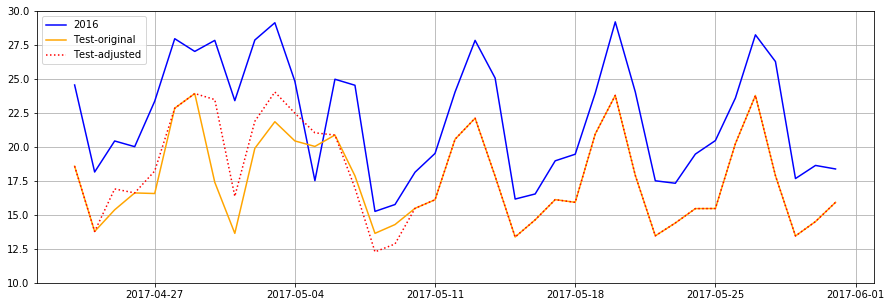

In [16]:
# 2016 Act vs 2017 Pred
pred = pd.DataFrame(sub.groupby(['visit_date'])['pred','visitors'].mean().reset_index()).rename(columns={'visitors':'pred_adj'})

train = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/air_visit_data.csv')[['visit_date','visitors']]
train['visit_date'] = pd.to_datetime(train['visit_date'])
train['visit_date'] = train['visit_date']+timedelta(days=365-1)
df = train[train.visit_date>=date(2017,4,23)]
df = df[df.visit_date<=date(2017,5,31)]
df = pd.DataFrame(df.groupby(['visit_date'])['visitors'].mean().reset_index())

df = df.merge(pred, on='visit_date', how='left')

plt.figure(figsize=(15,5))
plt.plot(df.visit_date, df.visitors, "blue", label = "2016")
plt.plot(df.visit_date, df.pred, "orange", label = "Test-original")
plt.plot(df.visit_date, df.pred_adj, "red", label = "Test-adjusted", linestyle='dotted')
plt.ylim(10,30)
plt.legend(loc='upper left')
plt.grid()